### Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract data

In [2]:
# Define paths
# Data from https://aqs.epa.gov/aqsweb/airdata/download_files.html
path15 = '../01_Resources/EPA_AQI_data/daily_aqi_by_county_2015.csv'
path16 = '../01_Resources/EPA_AQI_data/daily_aqi_by_county_2016.csv'
path17 = '../01_Resources/EPA_AQI_data/daily_aqi_by_county_2017.csv'
path18 = '../01_Resources/EPA_AQI_data/daily_aqi_by_county_2018.csv'
path19 = '../01_Resources/EPA_AQI_data/daily_aqi_by_county_2019.csv'
path20 = '../01_Resources/EPA_AQI_data/daily_aqi_by_county_2020.csv'

In [3]:
# Read in data for six year of AQI data
df15 = pd.DataFrame(pd.read_csv(path15))
df16 = pd.DataFrame(pd.read_csv(path16))
df17 = pd.DataFrame(pd.read_csv(path17))
df18 = pd.DataFrame(pd.read_csv(path18))
df19 = pd.DataFrame(pd.read_csv(path19))
df20 = pd.DataFrame(pd.read_csv(path20))

df19

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2019-01-03,18,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2019-01-06,35,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2019-01-09,14,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2019-01-12,36,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2019-01-15,38,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
340164,Wyoming,Weston,56,45,2019-12-27,36,Good,Ozone,56-045-0003,2
340165,Wyoming,Weston,56,45,2019-12-28,37,Good,Ozone,56-045-0003,2
340166,Wyoming,Weston,56,45,2019-12-29,34,Good,Ozone,56-045-0003,2
340167,Wyoming,Weston,56,45,2019-12-30,36,Good,Ozone,56-045-0003,2


# Transform data

In [4]:
# Append all six years into one DF
six_years_df = df15.append([df16,df17,df18,df19,df20], ignore_index=True)

In [5]:
# Split "Date" column into "Year", "Month", and "Day" columns
six_years_df['Year'] = [d.split('-')[0] for d in six_years_df.Date]
six_years_df['Month'] = [d.split('-')[1] for d in six_years_df.Date]
six_years_df['Day'] = [d.split('-')[2] for d in six_years_df.Date]

# Create column to hold Month and Day w/o year
# This is to compare specific days across all six years
# TODO: Find a cleaner, more effective way to do this
six_years_df['Month_Day'] = six_years_df['Month'] + '-' + six_years_df['Day']

# Change type from str to int64
six_years_df = six_years_df.astype({'Year': 'int64','Month': 'int64','Day': 'int64'})

# Drop unneeded columns
six_years_df = six_years_df.drop(columns={'State Code','Defining Site'})

# Limit DF to days before June
before_june_df = six_years_df.loc[six_years_df['Month']<6]

# Check result
before_june_df

,State Name,county Name,County Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,Year,Month,Day,Month_Day
0,Alabama,Baldwin,3,2015-01-03,28,Good,PM2.5,1,2015,1,3,01-03
1,Alabama,Baldwin,3,2015-01-06,48,Good,PM2.5,1,2015,1,6,01-06
2,Alabama,Baldwin,3,2015-01-09,55,Moderate,PM2.5,1,2015,1,9,01-09
3,Alabama,Baldwin,3,2015-01-12,41,Good,PM2.5,1,2015,1,12,01-12
4,Alabama,Baldwin,3,2015-01-15,26,Good,PM2.5,1,2015,1,15,01-15
...,...,...,...,...,...,...,...,...,...,...,...,...
1725441,Wyoming,Uinta,41,2020-03-27,5,Good,PM10,2,2020,3,27,03-27
1725442,Wyoming,Uinta,41,2020-03-28,6,Good,PM10,2,2020,3,28,03-28
1725443,Wyoming,Uinta,41,2020-03-29,6,Good,PM10,2,2020,3,29,03-29
1725444,Wyoming,Uinta,41,2020-03-30,5,Good,PM10,2,2020,3,30,03-30


In [7]:
# Create DF for just 2020 and 2019
df_19_20 = six_years_df.loc[((six_years_df['Year'] == 2019) | (six_years_df['Year'] == 2020))]
# Export to CSV
# df_19_20.to_csv('../01_Resources/2019-20_AQI_data.csv')


In [22]:
# Chage DF names and drop unsused
df_19_20 = df_19_20.drop(columns={'Year','Month','Day'})
df_19_20 = df_19_20.rename(columns={'State Name':'state',
                                    'county Name':'county',
                                    'County Code':'county_code',
                                    'Date':'date',
                                    'AQI':'aqi',
                                    'Category':'category',
                                    'Defining Parameter':'defining_parameter',
                                    'Number of Sites Reporting':'number_sites',
                                    'Month_Day':'month_day'
                                   })
df_19_20

,state,county,county_code,date,aqi,category,defining_parameter,number_sites,month_day
1344027,Alabama,Baldwin,3,2019-01-03,18,Good,PM2.5,1,01-03
1344028,Alabama,Baldwin,3,2019-01-06,35,Good,PM2.5,1,01-06
1344029,Alabama,Baldwin,3,2019-01-09,14,Good,PM2.5,1,01-09
1344030,Alabama,Baldwin,3,2019-01-12,36,Good,PM2.5,1,01-12
1344031,Alabama,Baldwin,3,2019-01-15,38,Good,PM2.5,1,01-15
...,...,...,...,...,...,...,...,...,...
1725441,Wyoming,Uinta,41,2020-03-27,5,Good,PM10,2,03-27
1725442,Wyoming,Uinta,41,2020-03-28,6,Good,PM10,2,03-28
1725443,Wyoming,Uinta,41,2020-03-29,6,Good,PM10,2,03-29
1725444,Wyoming,Uinta,41,2020-03-30,5,Good,PM10,2,03-30


# Load data

In [23]:
# Import dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, select, join

In [8]:
# Base = declarative_base()

# Create table schema
# class Aqi(Base):
#     # Tell SQLAlchemy what the table name is and if there are any table-specific arguments
#     __tablename__ = 'daily_aqi'
#     __table_args__ = {'sqlite_autoincrement': True}
#     # Tell SQLAlchemy the name of column and attributes
#     id = Column(Integer, primary_key=True, nullable=False) 
#     state = Column(VARCHAR(40))
#     county = Column(VARCHAR)
#     county_code = Column(Integer)
#     date = Column(Date)
#     aqi = Column(Integer)
#     category = Column(VARCHAR)
#     defining_parameter = Column(VARCHAR)
#     number_sites = Column(Integer)
#     year = Column(Integer)
#     month = Column(Integer)
#     day = Column(Integer)
#     month_day = Column(VARCHAR)
    
# # Create engine
# engine = create_engine('sqlite:///aqi.db')
# Base.metadata.create_all(engine)

# # Create SQLite DB from the six-year/Jan-June DF
# before_june_df.to_sql(con=engine, index_label='id', name=Aqi.__tablename__, if_exists='replace')

In [25]:
# Create engine
# Note: User will need to supply their own PostgreSQL password under variable below
user = 'postgres'
host = 'localhost'
# password = INSERT PASSWORD
port = '5432'
db = 'avg_aqi'
uri = f'postgresql://{user}:{password}@{host}:{port}/{db}'
uri
engine = create_engine(uri)

# Export content to SQL Tables (previously created in SQL)
df_19_20.to_sql(name='daily_aqi', con=engine, if_exists='replace', index=False)


# Exploration/Visualization

In [26]:
# Create DFs for the avg AQI for 2019 and 2020 by date
mean_aqi_19 = before_june_df.loc[before_june_df['Year']==2019].groupby('Date')['AQI'].mean()
mean_aqi_20 = before_june_df.loc[before_june_df['Year']==2020].groupby('Date')['AQI'].mean()

Text(0.5, 1.0, '2019 vs. 2020 Avg. Daily Air Quality Index')

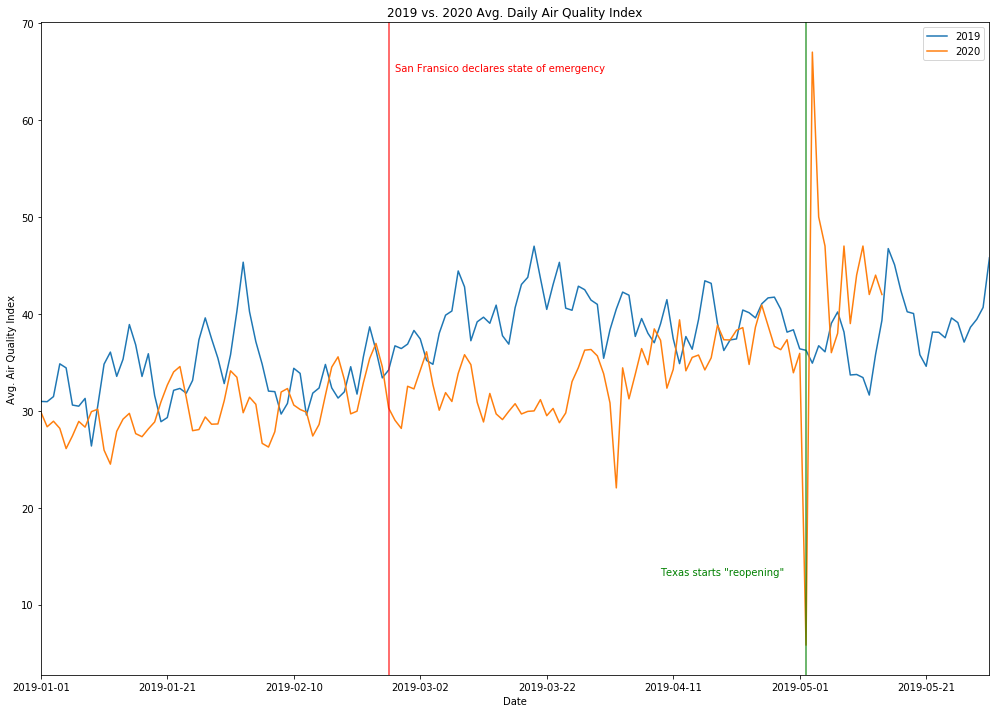

In [27]:
mean_aqi_19.plot(kind='line',figsize=(17,12))
plt.plot(mean_aqi_20)
plt.ylabel('Avg. Air Quality Index')
plt.axvline(x='2020-02-25',c='red',alpha=.75)
plt.axvline(x='2020-05-01',c='g',alpha=.75)
plt.annotate('San Fransico declares state of emergency', xy=('2020-02-26', 65), c='r')
plt.annotate('Texas starts "reopening"', xy=('2020-04-08', 13), c='g')
plt.legend(["2019","2020"])
plt.title("2019 vs. 2020 Avg. Daily Air Quality Index")

In [28]:
# Create DF to hold avg AQI for 2020 by day of the year
avg_2020 = six_years_df.loc[six_years_df['Year']==2020].groupby('Month_Day')['AQI'].mean().reset_index()

# Create DF to hold avg AQI for 2015-2019 by day of the year
avg_historic = six_years_df.loc[six_years_df['Month']<6]
avg_historic = avg_historic.loc[six_years_df.Year!=2020].groupby('Month_Day')['AQI'].mean().reset_index()

avg_2020

,Month_Day,AQI
0,01-01,29.896057
1,01-02,28.358416
2,01-03,28.930279
3,01-04,28.192982
4,01-05,26.107356
...,...,...
129,05-09,44.000000
130,05-10,47.000000
131,05-11,42.000000
132,05-12,44.000000


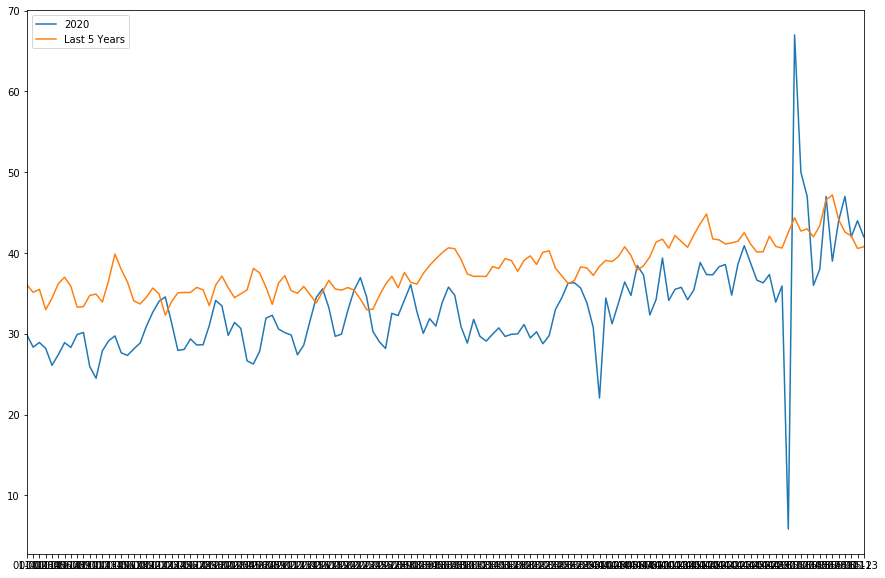

In [29]:
# TODO: fix this viz
# Need to figure out how to correctly compare dates across years
avg_2020.plot(kind='line',figsize=(15,10))
plt.plot(avg_historic['Month_Day'], avg_historic['AQI'])
plt.legend(["2020", "Last 5 Years"])